In [6]:
from delaunay import *

def VoronoiDiagram(points : list[Point]):
    del_tri = DelaunayTriangulation(points)
    for point in points:
        curr_triangle = del_tri.find_triangle(point)
        neighbourhood, hull = del_tri.find_neighbourhood(point, curr_triangle,{})
        del_tri.delete_neighbourhood(neighbourhood)
        del_tri.rebuild_neighbourhood(point,hull)
    return del_tri.neighbours, del_tri.triangulation


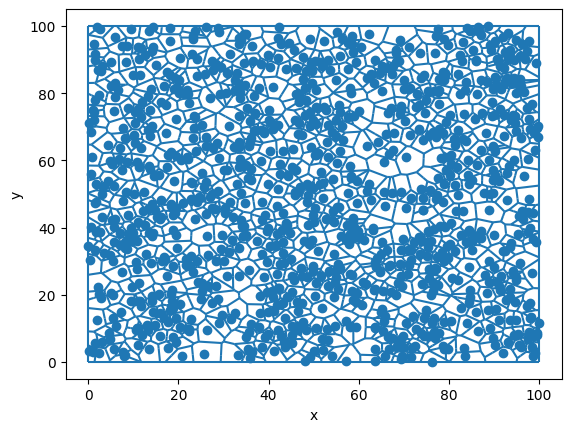

In [21]:
from fortuneJas import *
from random import uniform
from visualizer.main import Visualizer

def gen_points(n):
    list = []
    for _ in range(n):
        list.append(Point(uniform(0,100),uniform(0,100)))
    return list


def find_intersection_with_vertical_line(segment, x_coordinate):
    x1, y1 = segment[0]
    x2, y2 = segment[1]

    # Check if the segment is vertical (to avoid division by zero)
    if x1 == x2:
        # The segment is vertical, return None or handle it based on your requirements
        return None

    # Check if the vertical line is within the x-coordinate range of the segment
    if min(x1, x2) <= x_coordinate and x_coordinate <= max(x1, x2):
        # Calculate the y-coordinate of the intersection point using the equation of the line
        slope = (y2 - y1) / (x2 - x1)
        y_intersection = y1 + slope * (x_coordinate - x1)
        
        return (x_coordinate, y_intersection)
    else:
        # The vertical line is outside the x-coordinate range of the segment
        return None

def find_intersection_with_horizontal_line(segment, y_coordinate):
    x1, y1 = segment[0]
    x2, y2 = segment[1]

    # Check if the segment is horizontal (to avoid division by zero)
    if y1 == y2:
        # The segment is horizontal, return None or handle it based on your requirements
        return None

    # Check if the horizontal line is within the y-coordinate range of the segment
    if min(y1, y2) <= y_coordinate and y_coordinate <= max(y1, y2):
        # Calculate the x-coordinate of the intersection point using the equation of the line
        slope = (x2 - x1) / (y2 - y1)
        x_intersection = x1 + slope * (y_coordinate - y1)
        
        return (x_intersection, y_coordinate)
    else:
        # The horizontal line is outside the y-coordinate range of the segment
        return None

def bound(n,seg):
    if seg[0][0] < 0 and seg[1][0] < 0: return None
    if seg[0][0] > 10**n and seg[1][0] > 10**n: return None
    if seg[0][1] < 0 and seg[1][1] < 0: return None
    if seg[0][1] > 10**n and seg[1][1] > 10**n: return None

    intersection = find_intersection_with_vertical_line(seg,0)
    if intersection is not None:
        if seg[0][0] < 0: seg = (intersection,seg[1])
        elif seg[1][0] < 0: seg = (seg[0],intersection)
    intersection = find_intersection_with_vertical_line(seg,10**n)
    if intersection is not None:
        if seg[0][0] > 10**n: seg = (intersection,seg[1])
        elif seg[1][0] > 10**n: seg = (seg[0],intersection)
    intersection = find_intersection_with_horizontal_line(seg,0)
    if intersection is not None:
        if seg[0][1] < 0: seg = (intersection,seg[1])
        elif seg[1][1] < 0: seg = (seg[0],intersection)
    intersection = find_intersection_with_horizontal_line(seg,10**n)
    if intersection is not None:
        if seg[0][1] > 10**n: seg = (intersection,seg[1])
        elif seg[1][1] > 10**n: seg = (seg[0],intersection)
    return seg
    

points= gen_points(1000)
fortune = Voronoi(points)
fortune.process()
segments = fortune.get_output()
corr_out = []
for segment in segments:
    if  bound(2,segment) is not None:
        corr_out.append(bound(2,segment))
vis = Visualizer()
vis.add_line_segment(corr_out)
vis.add_line_segment([((0,0),(100,0)),((100,0),(100,100)),((100,100),(0,100)),((0,100),(0,0))])
vis.add_point([(p.x,p.y) for p in points])
vis.show()


